# 1.1.1

In [1]:
class Perceptron:
    def __init__(self, N):
        # создать нулевые веса
        self.w = list()
        for i in range(N):
            self.w.append(0)
    # метод для вычисления значений персептрона
    def calc(self, x):
        res = 0
        for i in range(len(self.w)):
            res = res + self.w[i] * x[i]
        return res
    # пороговая функция активации персептрона
    def sign(self, x):
        if self.calc(x) > 0:
            return 1
        else:
            return -1
    # Обучение на одном примере
    def learn(self, la, x, y):
        # Обучаем только когда результат неверный
        if y * self.calc(x) <= 0:
            for i in range(len(self.w)):
                self.w[i] = self.w[i] + la * y * x[i]
    # обучаем по всем данным Т - кортеж примеров
    def learning(self, la, T):
        # цикл обучения
        for n in range(100):
            # обучение по всему набору примеров
            for t in T:
                self.learn(la, t[0], t[1])

In [2]:
perceptron = Perceptron(2)
la = 0.1 # константа обучения
# создаем примеры
T = list()
T.append([[2,1],1])
T.append([[3,2],1])
T.append([[4,1],1])
T.append([[1,2],-1])
T.append([[2,3],-1])
T.append([[5,7],-1])
perceptron.learning(la, T) # обучение персептрона
print(perceptron.w) # печатаем веса
# проверим работу на тестовых примерах
print(perceptron.sign([1.5, 2]))
print(perceptron.sign([3, 1.5]))
print(perceptron.sign([5, 1]))
print(perceptron.sign([5, 10]))

[0.1, -0.1]
-1
1
1
-1


# 1.1.2

In [3]:
import numpy as np
def sigmoid(x):
    # Функция активации: f(x) = 1/(1+e^(-x))
    return 1/(1+np.exp(-x))
class Neuron:
    def __init__(self, weights, bias):
        self.weights = weights
        self.bias = bias
    def feedforward(self, inputs):
        total = np.dot(self.weights, inputs) + self.bias
        return sigmoid(total)

weights = np.array([0,1])    # w1 = 0, w2 = 1
bias = 4    # c = 4
n = Neuron(weights, bias)
x = np.array([2,3])   # x = 2, y = 3
print(n.feedforward(x))

0.9990889488055994


In [4]:
import numpy as np
class OurNeuralNetwork:
    """
    данные нейросети:
        - два входа
        - два нейрона в скрытых слоях (h1, h2)
        - выход (о1)
    нейроны имеют идентичные веса и пороги:
        - w = [0,1]
        - b = 0
    """
    def __init__(self):
        weights = np.array([0,1])
        bias = 0
        # класс Neuron из предыдущего раздела
        self.h1 = Neuron(weights, bias)
        self.h2 = Neuron(weights, bias)
        self.o1 = Neuron(weights, bias)
    def feedforward(self, x):
        out_h1 = self.h1.feedforward(x)
        out_h2 = self.h2.feedforward(x)
        # входы для о1 - это выходы h1 и h2
        out_o1 = self.o1.feedforward(np.array([out_h1, out_h2]))
        return out_o1

network = OurNeuralNetwork()
x = np.array([2,3])
print(network.feedforward(x))

0.7216325609518421


In [5]:
class NeuralNetwork:
    def __init__(self, x, y):
        self.input    = x
        self.weights1 = np.random.rand(self.input.shape[1],4)
        self.weights2 = np.random.rand(4,1)
        self.y        = y
        self.output   = np.zeros(y.shape)

In [6]:
class NeuralNetwork:
    def __init__(self, x, y):
        self.input    = x
        self.weights1 = np.random.rand(self.input.shape[1],4)
        self.weights2 = np.random.rand(4,1)
        self.y        = y
        self.output   = np.zeros(y.shape)
    def feedforward(self):
        self.layer1 = sigmoid(np.dot(self.input, self.weights1))
        self.output = sigmoid(np.dot(self.layer1, self.weights2))

In [7]:
class NeuralNetwork:
    def __init__(self, x, y):
        self.input    = x
        self.weights1 = np.random.rand(self.input.shape[1],4)
        self.weights2 = np.random.rand(4,1)
        self.y        = y
        self.output   = np.zeros(y.shape)
    def feedforward(self):
        self.layer1 = sigmoid(np.dot(self.input, self.weights1))
        self.output = sigmoid(np.dot(self.layer1, self.weights2))
    def backprop(self):
        # применение правила цепи для нахождения производной функции потерь по весу2 и весу1
        d_weights2 = np.dot(self.layer1.T, (2*(self.y - self.output) * sigmoid(self.output)))
        d_weights1 = np.dot(self.input.T, (np.dot(2*(self.y - self.output) * sigmoid(self.output), self.weights2.T) * sigmoid(self.layer1)))
        # обновление веса производной (наклона) функции потерь
        self.weights1 += d_weights1
        self.weights2 += d_weights2        

# Задание

In [8]:
import numpy as np
class OurNeuralNetwork:
    """
    данные нейросети:
        − три входа (𝑥1,𝑥2,𝑥3);
        − три нейрона в скрытых слоях (ℎ1,ℎ2,ℎ3);
        − выход (𝑜1).
    нейроны имеют идентичные веса и пороги:
        − 𝑤 = [0.5,0.5,0.5]
        − 𝑏 = 0     
    """
    def __init__(self):
        weights = np.array([0.5,0.5,0.5])
        bias = 0
        # класс Neuron из предыдущего раздела
        self.h1 = Neuron(weights, bias)
        self.h2 = Neuron(weights, bias)
        self.h3 = Neuron(weights, bias)
        self.o1 = Neuron(weights, bias)
    def feedforward(self, x):
        out_h1 = self.h1.feedforward(x)
        out_h2 = self.h2.feedforward(x)
        out_h3 = self.h3.feedforward(x)
        # входы для о1 - это выходы h1 и h2 и h3
        out_o1 = self.o1.feedforward(np.array([out_h1, out_h2, out_h3]))
        return out_o1

network = OurNeuralNetwork()
x = np.array([2,3,4])
print(network.feedforward(x))

0.8151036049051821


In [9]:
import numpy as np
class OurNeuralNetwork:
    """
    данные нейросети:
        - два входа
        - два нейрона в скрытых слоях (h1, h2)
        - выход (о1, o2)
    нейроны имеют идентичные веса и пороги:
        - w = [1,0]
        - b = 1
    """
    def __init__(self):
        weights = np.array([1,0])
        bias = 1
        # класс Neuron из предыдущего раздела
        self.h1 = Neuron(weights, bias)
        self.h2 = Neuron(weights, bias)
        self.o1 = Neuron(weights, bias)
        self.o2 = Neuron(weights, bias)
        self.o = Neuron(weights, bias)
    def feedforward(self, x):
        out_h1 = self.h1.feedforward(x)
        out_h2 = self.h2.feedforward(x)
        # входы для о1 - это выходы h1 и h2
        out_o1 = self.o1.feedforward(np.array([out_h1, out_h2]))
        out_o2 = self.o2.feedforward(np.array([out_h2, out_h1]))
        out_o = self.o.feedforward(np.array([out_o2, out_o1]))
        return out_o

network = OurNeuralNetwork()
x = np.array([2,3])
print(network.feedforward(x))

0.8671195555587996


# Задание

In [10]:
from cmath import tanh


class NeuralNetwork:
    def __init__(self, x, y):
        self.input    = x
        self.weights1 = np.random.rand(self.input.shape[1],4)
        self.weights2 = np.random.rand(4,1)
        self.y        = y
        self.output   = np.zeros(y.shape)

    def tanh_derivative(self, x):
        return 1 - tanh(x) * tanh(x)
    def feedforward(self):
        self.layer1 = tanh(np.dot(self.input, self.weights1))
        self.output = tanh(np.dot(self.layer1, self.weights2))
    def backprop(self):
        # применение правила цепи для нахождения производной функции потерь по весу2 и весу1
        d_weights2 = np.dot(self.layer1.T, (2*(self.y - self.output) * self.tanh_derivative(self.output)))
        d_weights1 = np.dot(self.input.T, (np.dot(2*(self.y - self.output) * self.tanh_derivative(self.output), self.weights2.T) * self.tanh_derivative(self.layer1)))
        # обновление веса производной (наклона) функции потерь
        self.weights1 += d_weights1
        self.weights2 += d_weights2   

In [11]:
from cmath import tanh


class NeuralNetwork:
    def __init__(self, x, y):
        self.input    = x
        self.weights1 = np.random.rand(self.input.shape[1],4)
        self.weights2 = np.random.rand(4,1)
        self.y        = y
        self.output   = np.zeros(y.shape)

    def ReLU_derivative(self, x):
        if x >= 0:
            return 1
        else:
            return 0
    def feedforward(self):
        self.layer1 = max(0, np.dot(self.input, self.weights1))
        self.output = max(0, np.dot(self.layer1, self.weights2))
    def backprop(self):
        # применение правила цепи для нахождения производной функции потерь по весу2 и весу1
        d_weights2 = np.dot(self.layer1.T, (2*(self.y - self.output) * self.ReLU_derivative(self.output)))
        d_weights1 = np.dot(self.input.T, (np.dot(2*(self.y - self.output) * self.ReLU_derivative(self.output), self.weights2.T) * self.ReLU_derivative(self.layer1)))
        # обновление веса производной (наклона) функции потерь
        self.weights1 += d_weights1
        self.weights2 += d_weights2   

# 1.2

In [42]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import sklearn

In [43]:
from sklearn.datasets import load_digits, fetch_california_housing

digits = load_digits()
X_digits, Y_digits = digits.data, digits.target
print('Dataset Sizes: ', X_digits.shape, Y_digits.shape)

Dataset Sizes:  (1797, 64) (1797,)


In [44]:
boston = fetch_california_housing()
X_california, Y_california = boston.data, boston.target
print('Dataset Sizes: ', X_california.shape, Y_california.shape)

Dataset Sizes:  (20640, 8) (20640,)


In [45]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X_digits, Y_digits,
                                     train_size=0.80, test_size=0.20, stratify=Y_digits, random_state=123)

print('Train/Test sizes: ', X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)

Train/Test sizes:  (1437, 64) (360, 64) (1437,) (360,)


In [46]:
from sklearn.neural_network import MLPClassifier
mlp_classifier = MLPClassifier(random_state=123)
mlp_classifier.fit(X_train, Y_train)

MLPClassifier(random_state=123)

In [47]:
MLPClassifier(
    activation='relu',
    alpha=0.0001,
    batch_size='auto',
    beta_1=0.9,
    beta_2=0.999,
    early_stopping=False,
    epsilon=1e-08,
    hidden_layer_sizes=(100,),
    learning_rate='constant',
    learning_rate_init=0.001,
    max_iter=200,
    momentum=0.9,
    n_iter_no_change=10,
    nesterovs_momentum=True,
    power_t=0.5,
    random_state=123,
    shuffle=True,
    solver='adam',
    tol=0.0001,
    validation_fraction=0.1,
    verbose=False,
    warm_start=False
)

MLPClassifier(random_state=123)

In [48]:
Y_preds = mlp_classifier.predict(X_test)

print(Y_preds[:15])
print(Y_test[:15])
## ммтедо Score для оценки точности моделей классификации
print('Test Accurancy: %.3f'%mlp_classifier.score(X_test, Y_test))
print('Training Accurancy: %.3f'%mlp_classifier.score(X_train, Y_train))

[5 9 9 6 1 6 6 9 8 7 4 2 1 4 3]
[5 9 9 6 1 6 6 9 8 7 4 2 1 4 3]
Test Accurancy: 0.983
Training Accurancy: 1.000


In [49]:
from turtle import color
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(Y_test, Y_preds):
    conf_mat = confusion_matrix(Y_test, Y_preds)
    #print(conf_mat)
    fig = plt.figure(figsize=(6,6))
    plt.matshow(conf_mat, cmap=plt.cm.Blues, fignum=1)
    plt.yticks(range(10), range(10))
    plt.xticks(range(10), range(10))
    plt.colorbar();
    for i in range(10):
        for j in range(10):
            plt.text(i-0.2,j+0.1, str(conf_mat[j,i]), color='tab:red')

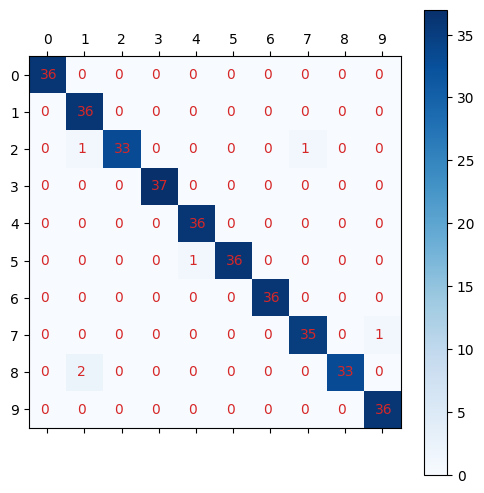

In [50]:
plot_confusion_matrix(Y_test, mlp_classifier.predict(X_test))

In [51]:
print("Loss: ", mlp_classifier.loss_)
print("Number of coefs: ", len(mlp_classifier.coefs_))
print("Number of intercepts: ", len(mlp_classifier.intercepts_))
print("Number of iterations for which estimator ran: ", mlp_classifier.n_iter_)
print("Name of output layer activation function: ", mlp_classifier.out_activation_)

Loss:  0.0034728684994180603
Number of coefs:  2
Number of intercepts:  2
Number of iterations for which estimator ran:  125
Name of output layer activation function:  softmax


In [52]:
X_train, X_test, Y_train, Y_test = train_test_split(X_boston, Y_boston,
                                     train_size=0.80, test_size=0.20, random_state=123)

print('Train/Test sizes: ', X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)

Train/Test sizes:  (16512, 8) (4128, 8) (16512,) (4128,)


In [53]:
from sklearn.neural_network import MLPRegressor
mlp_regressor = MLPRegressor(random_state=123)
mlp_regressor.fit(X_train, Y_train)

MLPRegressor(random_state=123)

In [54]:
MLPRegressor(
    activation='relu',
    alpha=0.0001,
    batch_size='auto',
    beta_1=0.9,
    beta_2=0.999,
    early_stopping=False,
    epsilon=1e-08,
    hidden_layer_sizes=(100,),
    learning_rate='constant',
    learning_rate_init=0.001,
    max_iter=200,
    momentum=0.9,
    n_iter_no_change=10,
    nesterovs_momentum=True,
    power_t=0.5,
    random_state=123,
    shuffle=True,
    solver='adam',
    tol=0.0001,
    validation_fraction=0.1,
    verbose=False,
    warm_start=False
)

MLPRegressor(random_state=123)

In [55]:
Y_preds = mlp_regressor.predict(X_test)

print(Y_preds[:10])
print(Y_test[:10])
## ммтедо Score для оценки точности моделей классификации
print('Test R^2 Score: %.3f'%mlp_regressor.score(X_test, Y_test))
print('Training R^2 Score: %.3f'%mlp_regressor.score(X_train, Y_train))


[1.90219935 1.43047514 1.3506227  0.76890059 2.34997826 2.56749015
 0.78763273 1.84240978 1.57480889 1.25957592]
[1.516 0.992 1.345 2.317 4.629 1.407 1.703 1.603 1.018 1.688]
Test R^2 Score: 0.417
Training R^2 Score: 0.418


In [56]:
print("Loss: ", mlp_regressor.loss_)
print("Number of coefs: ", len(mlp_regressor.coefs_))
print("Number of intercepts: ", len(mlp_regressor.intercepts_))
print("Number of iterations for which estimator ran: ", mlp_regressor.n_iter_)
print("Name of output layer activation function: ", mlp_regressor.out_activation_)

Loss:  0.4300269886734786
Number of coefs:  2
Number of intercepts:  2
Number of iterations for which estimator ran:  28
Name of output layer activation function:  identity


# Задание

In [57]:
url = r'https://gist.githubusercontent.com/netj/8836201/raw/6f9306ad21398ea43cba4f7d537619d0e07d5ae3/iris.csv'

data = pd.read_csv(url)

X_train, X_test, y_train, y_test = train_test_split(
    data.iloc[:,:-1],    # все колонки кроме последней - в признаки
    data.iloc[:,-1], # последнюю в целевую переменную (класс)
    test_size = 0.20 # размер тестовой выборки 20%
)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

from sklearn.neural_network import MLPClassifier
mlp_classifier = MLPClassifier(random_state=123)
mlp_classifier.fit(X_train, y_train)

c:\Users\danil\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(random_state=123)

In [58]:
Y_preds = mlp_classifier.predict(X_test)

print(Y_preds[:15])
print(y_test[:15])
## ммтедо Score для оценки точности моделей классификации
print('Test Accurancy: %.3f'%mlp_classifier.score(X_test, y_test))
print('Training Accurancy: %.3f'%mlp_classifier.score(X_train, y_train))

['Setosa' 'Setosa' 'Setosa' 'Virginica' 'Versicolor' 'Virginica'
 'Versicolor' 'Virginica' 'Versicolor' 'Setosa' 'Versicolor' 'Virginica'
 'Setosa' 'Versicolor' 'Versicolor']
11         Setosa
5          Setosa
20         Setosa
120     Virginica
74     Versicolor
109     Virginica
77     Versicolor
100     Virginica
65     Versicolor
47         Setosa
99     Versicolor
144     Virginica
49         Setosa
63     Versicolor
53     Versicolor
Name: variety, dtype: object
Test Accurancy: 1.000
Training Accurancy: 0.967


In [59]:
print("Loss: ", mlp_classifier.loss_)
print("Number of coefs: ", len(mlp_classifier.coefs_))
print("Number of intercepts: ", len(mlp_classifier.intercepts_))
print("Number of iterations for which estimator ran: ", mlp_classifier.n_iter_)
print("Name of output layer activation function: ", mlp_classifier.out_activation_)

Loss:  0.3178020744759899
Number of coefs:  2
Number of intercepts:  2
Number of iterations for which estimator ran:  200
Name of output layer activation function:  softmax


In [60]:
url = r'https://raw.githubusercontent.com/AnnaShestova/salary-years-simple-linear-regression/master/Salary_Data.csv'

data = pd.read_csv(url)

X_train, X_test, y_train, y_test = train_test_split(
    data.iloc[:,:-1].values,    # все колонки кроме последней - в признаки
    data.iloc[:,-1].values, # последнюю в целевую переменную (класс)
    test_size = 0.20, # размер тестовой выборки 20%
    random_state=123
)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

from sklearn.neural_network import MLPRegressor
mlp_regressor = MLPRegressor(random_state=123)
mlp_regressor.fit(X_train, y_train)

(24, 1) (6, 1) (24,) (6,)


c:\Users\danil\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPRegressor(random_state=123)

In [61]:
Y_preds = mlp_regressor.predict(X_test)

print(Y_preds[:10])
print(y_test[:10])
## ммтедо Score для оценки точности моделей классификации
print('Test R^2: %.3f'%mlp_regressor.score(X_test, y_test))
print('Training R^2: %.3f'%mlp_regressor.score(X_train, y_train))

[20.26234628 55.2781752  18.82135812 50.48274487 20.26234628 50.9622879 ]
[ 54445. 121872.  56642. 116969.  64445. 112635.]
Test R^2: -8.796
Training R^2: -8.261


In [62]:
print("Loss: ", mlp_regressor.loss_)
print("Number of coefs: ", len(mlp_regressor.coefs_))
print("Number of intercepts: ", len(mlp_regressor.intercepts_))
print("Number of iterations for which estimator ran: ", mlp_regressor.n_iter_)
print("Name of output layer activation function: ", mlp_regressor.out_activation_)

Loss:  2988058032.1601596
Number of coefs:  2
Number of intercepts:  2
Number of iterations for which estimator ran:  200
Name of output layer activation function:  identity
